In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

In [2]:
# Load dataset
data = pd.read_csv('../data/ENB2012_data_with_columns.csv')

# Check for NaN values and replace or drop them
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()

In [3]:
# Define input and output variables
X = data.iloc[:, :-2]
y_hl = data['Heating_Load']
y_cl = data['Cooling_Load']

In [4]:
# Initialize models with best parameters
best_params_hl = {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 1}
best_params_cl = {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}

xgb_model_hl = XGBRegressor(**best_params_hl)
xgb_model_cl = XGBRegressor(**best_params_cl)

In [5]:
# Perform 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

actual_vs_predicted_hl = []
actual_vs_predicted_cl = []

fold = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train_hl, y_test_hl = y_hl.iloc[train_index], y_hl.iloc[test_index]
    y_train_cl, y_test_cl = y_cl.iloc[train_index], y_cl.iloc[test_index]
    
    # Train the models
    xgb_model_hl.fit(X_train, y_train_hl)
    xgb_model_cl.fit(X_train, y_train_cl)
    
    # Predict
    y_pred_hl = xgb_model_hl.predict(X_test)
    y_pred_cl = xgb_model_cl.predict(X_test)
    
    # Collect actual vs predicted values
    actual_vs_predicted_hl.append((y_test_hl, y_pred_hl))
    actual_vs_predicted_cl.append((y_test_cl, y_pred_cl))
    
    fold += 1

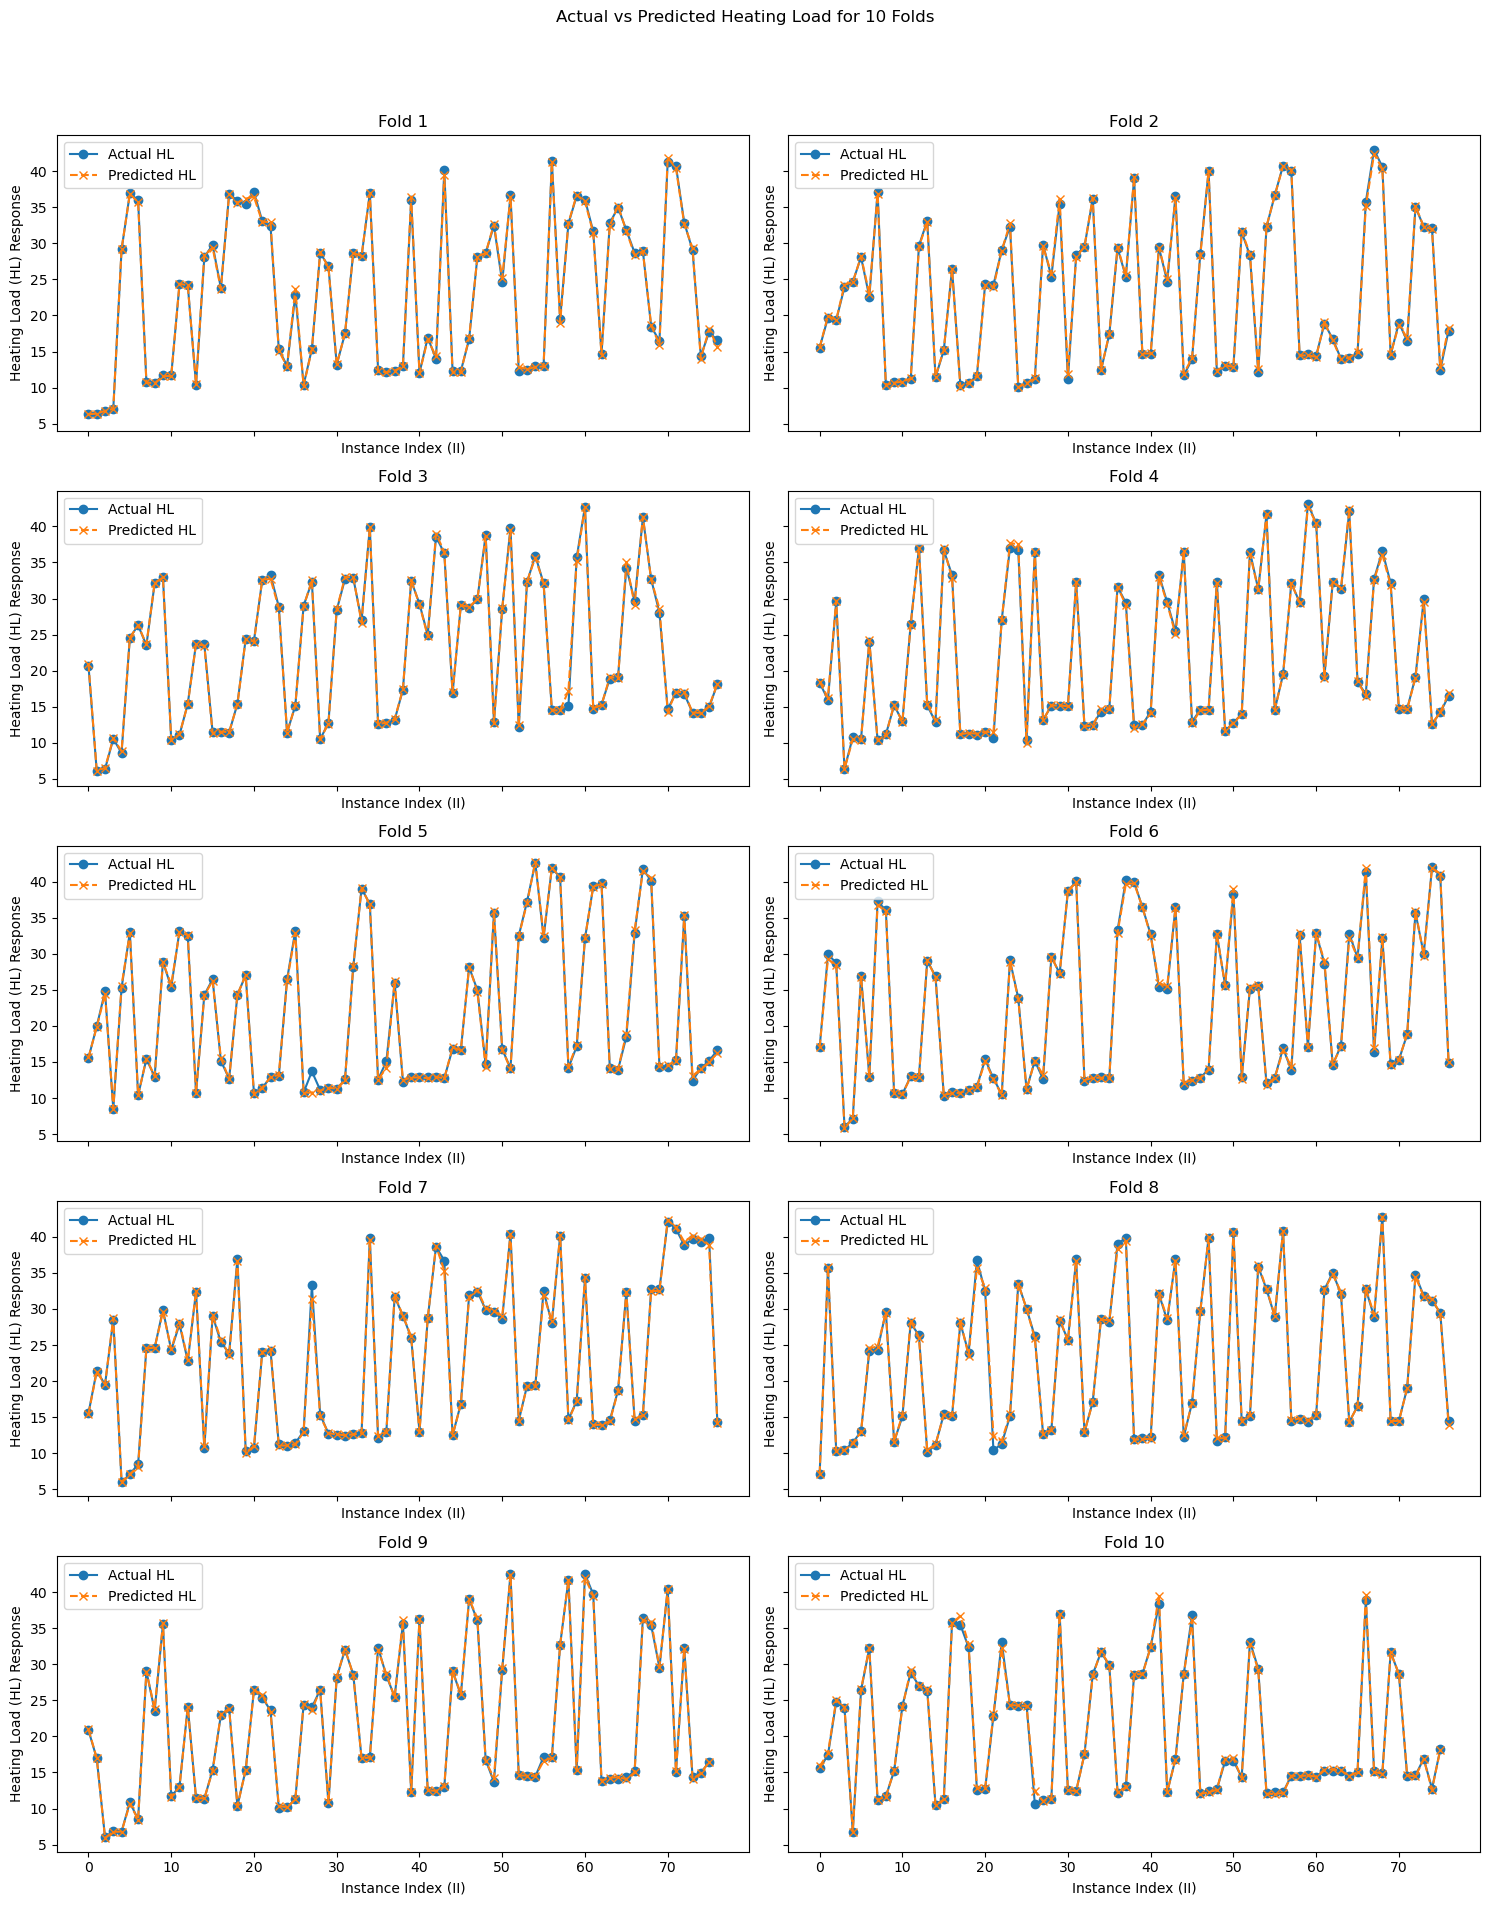

In [7]:
# Plotting Actual vs Predicted for Heating Load
fig, axes = plt.subplots(5, 2, figsize=(15, 20), sharex=True, sharey=True)
fig.suptitle('Actual vs Predicted Heating Load for 10 Folds')

for i, (y_test_hl, y_pred_hl) in enumerate(actual_vs_predicted_hl):
    ax = axes[i // 2, i % 2]
    ax.plot(y_test_hl.values, label='Actual HL', linestyle='-', marker='o')
    ax.plot(y_pred_hl, label='Predicted HL', linestyle='--', marker='x')
    ax.set_title(f'Fold {i + 1}')
    ax.set_xlabel('Instance Index (II)')
    ax.set_ylabel('Heating Load (HL) Response')
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('../results/figures/actual_vs_predicted_heating_load_10_folds.png')
plt.show()

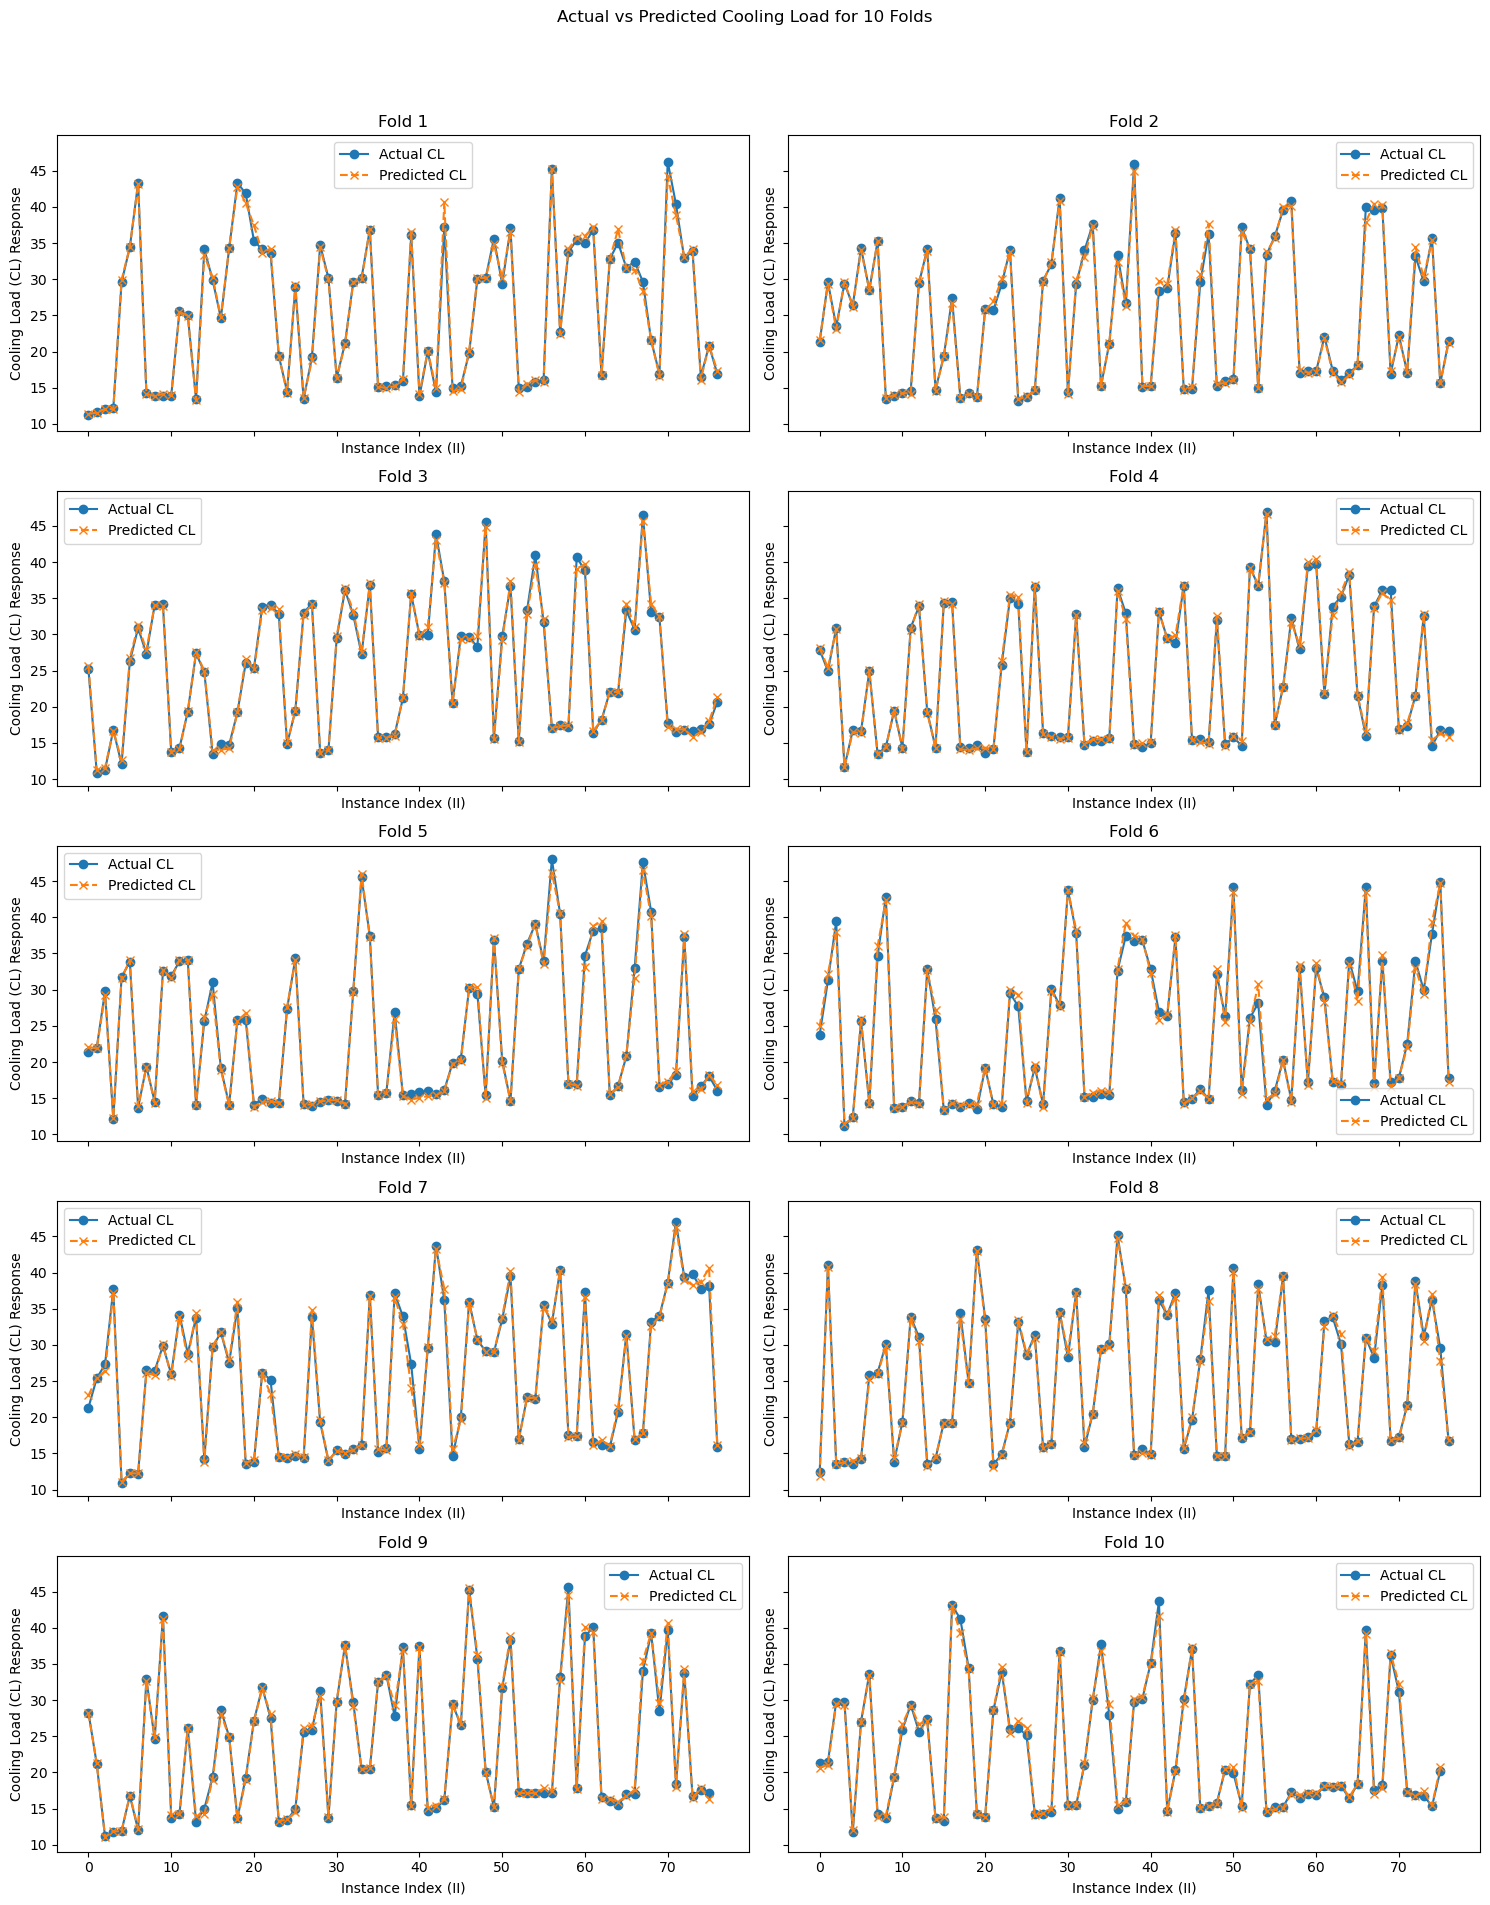

In [8]:
# Plotting Actual vs Predicted for Cooling Load
fig, axes = plt.subplots(5, 2, figsize=(15, 20), sharex=True, sharey=True)
fig.suptitle('Actual vs Predicted Cooling Load for 10 Folds')

for i, (y_test_cl, y_pred_cl) in enumerate(actual_vs_predicted_cl):
    ax = axes[i // 2, i % 2]
    ax.plot(y_test_cl.values, label='Actual CL', linestyle='-', marker='o')
    ax.plot(y_pred_cl, label='Predicted CL', linestyle='--', marker='x')
    ax.set_title(f'Fold {i + 1}')
    ax.set_xlabel('Instance Index (II)')
    ax.set_ylabel('Cooling Load (CL) Response')
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('../results/figures/actual_vs_predicted_cooling_load_10_folds.png')
plt.show()